<a href="https://colab.research.google.com/github/ipsilon7/Analisis-de-datos-de-IMDb/blob/main/Proceso_ETL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Extraccion**

La fuente de datos es de tipo estructurada (CSV). Al momento de cargar los datos se utiliza el parametro dtype para que la carga sea mas rapida (debido a que pandas no infiere automaticamente el tipo de dato), use menos memoria y las operaciones y filtrados de datos sean mas eficientes. Imprimimos los tipos de datos, para comprobar que se haya cargado correctamente, y el uso de memoria.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# URL del archivo en GitHub
url = 'https://raw.githubusercontent.com/ipsilon7/Analisis-de-datos-de-IMDb/refs/heads/main/Database/IMDb%20database.csv'

# Cargar el archivo CSV desde GitHub
df = pd.read_csv(url, dtype={
    "id": "string",
    "title": "string",
    "type": "category",
    "genres": "string",
    "averageRating": "float32",
    "numVotes": "Int32", # Int32 con mayúscula para permitir NaN
    "releaseYear": "Int16" # También permite NaN
})

print(df.dtypes)
print(f"Uso de memoria: {df.memory_usage(deep=True).sum() / (1024**2):.2f} MB")

id               string[python]
title            string[python]
type                   category
genres           string[python]
averageRating           float32
numVotes                  Int32
releaseYear               Int16
dtype: object
Uso de memoria: 219.42 MB


Comprobaremos que el tamaño del dataset y la cantidad de columnas sea correcto y le daremos un vistazo rapido a los datos.

In [ ]:
# Mostramos las primeras 5 filas del DataFrame
print(df.head())

          id                          title   type  \
0  tt0000009                     Miss Jerry  movie   
1  tt0000147  The Corbett-Fitzsimmons Fight  movie   
2  tt0000502                       Bohemios  movie   
3  tt0000574    The Story of the Kelly Gang  movie   
4  tt0000591               The Prodigal Son  movie   

                         genres  averageRating  numVotes  releaseYear  
0                       Romance            5.4       215         1894  
1      Documentary, News, Sport            5.2       539         1897  
2                          <NA>            4.4        18         1905  
3  Action, Adventure, Biography            6.0       939         1906  
4                         Drama            5.7        28         1907  


In [ ]:
# Mostramos las ultimas 5 filas del DataFrame
print(df.tail())

                 id                         title   type           genres  \
1029441  tt34605925                     Aitraaz 2  movie             <NA>   
1029442  tt34606028                  Tukar Takdir  movie  Drama, Thriller   
1029443  tt34606054                    Regnmannen  movie            Drama   
1029444  tt34606065                    Victor 303  movie            Drama   
1029445  tt34606074  Lady and a Loser go to Vegas  movie         Thriller   

         averageRating  numVotes  releaseYear  
1029441            NaN      <NA>         <NA>  
1029442            NaN      <NA>         <NA>  
1029443            NaN      <NA>         <NA>  
1029444            NaN      <NA>         2025  
1029445            NaN      <NA>         <NA>  


In [2]:
# Mostramos información general del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029446 entries, 0 to 1029445
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype   
---  ------         --------------    -----   
 0   id             1029446 non-null  string  
 1   title          1029446 non-null  string  
 2   type           1029446 non-null  category
 3   genres         928808 non-null   string  
 4   averageRating  439071 non-null   float32 
 5   numVotes       439071 non-null   Int32   
 6   releaseYear    900924 non-null   Int16   
dtypes: Int16(1), Int32(1), category(1), float32(1), string(3)
memory usage: 36.3 MB



El metodo info() nos devolvio la siguiente informacion:<br>
<br>
class='pandas.core.frame.DataFrame'<br>
RangeIndex: 1029446 entries, 0 to 1029445<br>
Data columns (total 7 columns):<br>

|#|Column|Non-Null count|Dtype|
|-----|-----|-----|-----|
|0|id|1029446 non-null|string|
|1|title|         1029446 non-null|string|
|2|  type|           1029446 non-null|  category |
|3|  genres|         928808 non-null|   string |
|4|  averageRating|  439071 non-null|   float32|
|5|  numVotes| 439071 non-null|   Int32|
|6|   releaseYear|    900924 non-null|   Int16|

dtypes: Int16(1), Int32(1), category(1), float32(1), string(3)
memory usage: 36.3 MB

<br>

* Las columnas "id", "type" y "title" tienen la misma cantidad de registros que el total por lo que no hay datos faltantes.
* Las columnas de "averageRating" y "numVotes" contienen la misma cantidad de datos faltantes por lo que puede indicar una correlacion entre estas variables y un dato no menor es que menos de la mitad (42,65% para ser exactos) del dataset contiene datos de puntuacion y cantidad de votos.
* Por ultimo, las columnas de generos y año de lanzamiento tambien tienen datos faltantes.

<br>

El porcentaje de datos faltantes por columna quedaria de la siguiente manera:

<br>

| Columna       | % de datos faltantes |
|---------------|:--------------------:|
| id            | 0%     |
| title         | 0%     |
| type          | 0%     |
| genres        | 9,77%  |
| averageRating | 57,34% |
| numVotes      | 57,34% |
| releaseYear   | 12,48% |

<br>

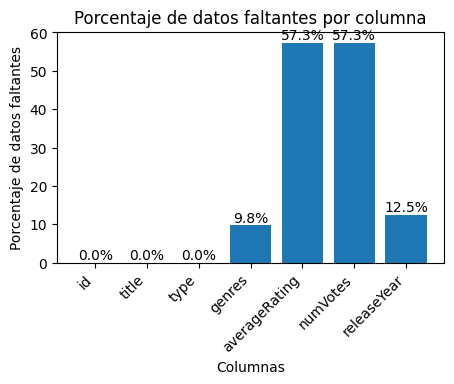

id                0.000000
title             0.000000
type              0.000000
genres            9.775938
averageRating    57.348807
numVotes         57.348807
releaseYear      12.484579
dtype: float64


In [3]:
# Calcular el porcentaje de datos faltantes por columna
missing_percentage = df.isnull().sum() * 100 / len(df)

# Crear el gráfico de barras
plt.figure(figsize=(5, 3))
plt.bar(missing_percentage.index, missing_percentage.values)
plt.title('Porcentaje de datos faltantes por columna')
plt.xlabel('Columnas')
plt.ylabel('Porcentaje de datos faltantes')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejor legibilidad

# Agregar etiquetas con porcentajes a las barras
for i, v in enumerate(missing_percentage.values):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

# Mostrar el gráfico
plt.show()
print(missing_percentage)

In [6]:
# Mostramos estadísticas descriptivas del DataFrame
print(df.describe(include="all")) # El parametro include="all" incluye en las estadisticas columnas string y categoricas

               id    title     type  genres  averageRating      numVotes  \
count     1029446  1029446  1029446  928808  439071.000000      439071.0   
unique    1029446   877736        3    2061            NaN          <NA>   
top     tt0000009     Home    movie   Drama            NaN          <NA>   
freq            1       81   698393  162604            NaN          <NA>   
mean          NaN      NaN      NaN     NaN       6.363222   3047.631873   
std           NaN      NaN      NaN     NaN       1.431767  32668.064801   
min           NaN      NaN      NaN     NaN       1.000000           5.0   
25%           NaN      NaN      NaN     NaN       5.500000          17.0   
50%           NaN      NaN      NaN     NaN       6.500000          52.0   
75%           NaN      NaN      NaN     NaN       7.400000         260.0   
max           NaN      NaN      NaN     NaN      10.000000     2963270.0   

        releaseYear  
count      900924.0  
unique         <NA>  
top            <NA>  

## **Transformacion**